<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2019-11-03 23:59:59</font></h2>
<h3 align="center"><font size="5"> Total marks: 3.0</font></h3>
<h3 align="center"><font size="5">(Optional)</font></h3>

### Your information:
- Fullname:
- Date of birth:
- Place of birth:
- Email:
- Mobile phone:

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Algorithm** to predict: "price of car" by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
from sklearn import preprocessing

In [5]:
tenCot=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration','num-of-doors',
        'body-style', 'drive-wheels', 'engine-location','wheel-base', 'length', 'width', 'height',
        'curb-weight', 'engine-type','num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg', 'price']

In [6]:
data=pd.read_csv("imports_85.csv",names=tenCot)

In [7]:
data.shape

(205, 26)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
objects=[i for i in data.columns if data.dtypes[i]=='object']
i=1
for j in objects:
    print(i,"--".ljust(2),j.ljust(20),"--",str(len(data[j].unique())).ljust(4),"--:--",
          data[j].unique() if len(data[j].unique())<100 else "")
    i=i+1

1 -- normalized-losses    -- 52   --:-- ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
2 -- make                 -- 22   --:-- ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
3 -- fuel-type            -- 2    --:-- ['gas' 'diesel']
4 -- aspiration           -- 2    --:-- ['std' 'turbo']
5 -- num-of-doors         -- 3    --:-- ['two' 'four' '?']
6 -- body-style           -- 5    --:-- ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
7 -- drive-wheels         -- 3    --:-- ['rwd' 'fwd' '4wd']
8 -- engine-location      -- 2    --:-- ['front' 'rear']
9 -- engine-type 

##### Các không có giá trị null, và các số đang ở object, nên phải đổi lại dạng số, tuy nhiên trong dữ liệu có xuất hiện dấu ?, nên đây là null, cần được xử lý

##### Các biến ở object nên cần được chuyển về dạng số đối với các biến numeric

In [12]:
a=['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
for col in a:
    data[col]=pd.to_numeric(data[col],errors='coerce')

# Các biến object

In [14]:
objects=[i for i in data.columns if data.dtypes[i]=='object']
i=1
for j in objects:
    print(i,"--".ljust(2),j.ljust(20),"--",str(len(data[j].unique())).ljust(4),"--:--",
          data[j].unique() if len(data[j].unique())<25 else "")
    i=i+1

1 -- normalized-losses    -- 52   --:-- 
2 -- make                 -- 22   --:-- ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
3 -- fuel-type            -- 2    --:-- ['gas' 'diesel']
4 -- aspiration           -- 2    --:-- ['std' 'turbo']
5 -- num-of-doors         -- 3    --:-- ['two' 'four' '?']
6 -- body-style           -- 5    --:-- ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
7 -- drive-wheels         -- 3    --:-- ['rwd' 'fwd' '4wd']
8 -- engine-location      -- 2    --:-- ['front' 'rear']
9 -- engine-type          -- 7    --:-- ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
10 -- num-of-cylinders     -- 7    --:-- ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
11 -- fuel-system          -- 8    --:-- ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
12 -- bore                 -- 39   --

In [15]:
data=data[data["num-of-doors"]!="?"]

In [20]:
data.shape

(203, 26)

# Các biến Numeric

In [21]:
objects=[i for i in data.columns if data.dtypes[i]!='object']
i=1
for j in objects:
    print(i,"--".ljust(2),j.ljust(20),"--",str(len(data[j].unique())).ljust(4),"--:--",
          data[j].unique() if len(data[j].unique())<10 else "")
    i=i+1

1 -- symboling            -- 6    --:-- [ 3  1  2  0 -1 -2]
2 -- wheel-base           -- 53   --:-- 
3 -- length               -- 75   --:-- 
4 -- width                -- 44   --:-- 
5 -- height               -- 49   --:-- 
6 -- curb-weight          -- 170  --:-- 
7 -- engine-size          -- 44   --:-- 
8 -- compression-ratio    -- 31   --:-- 
9 -- city-mpg             -- 28   --:-- 
10 -- highway-mpg          -- 30   --:-- 


### Sympoling là biến phân loại, do đó dữ liệu có 15 biến liên tục, 11 biến phân loại

In [22]:
data['symboling']=data['symboling'].astype('category')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          203 non-null    category
 1   normalized-losses  203 non-null    object  
 2   make               203 non-null    object  
 3   fuel-type          203 non-null    object  
 4   aspiration         203 non-null    object  
 5   num-of-doors       203 non-null    object  
 6   body-style         203 non-null    object  
 7   drive-wheels       203 non-null    object  
 8   engine-location    203 non-null    object  
 9   wheel-base         203 non-null    float64 
 10  length             203 non-null    float64 
 11  width              203 non-null    float64 
 12  height             203 non-null    float64 
 13  curb-weight        203 non-null    int64   
 14  engine-type        203 non-null    object  
 15  num-of-cylinders   203 non-null    object  
 16  engine-s

In [28]:
print("Cac bien co gia tri null:")
for i in data.columns:
    if data[i].isnull().sum()>0:
        print(i.ljust(20)+":"+str(data[i].isnull().sum()))

Cac bien co gia tri null:


Dữ liệu của cột normalized-loses bị null quá nhiều, 40 mẫu tương đương với 20% mẫu, quá lớn, trong khi các thuộc tính khác thì ít, nên quyết định loại bỏ cột normalized và các dòng có giá trị null

In [29]:
xe=data.drop(["normalized-losses"],axis=1)
xe=xe.dropna(axis=0)
xe=xe[xe["num-of-doors"]!="?"]
xe.shape

(203, 25)

Sau khi loại bỏ các NA thì dữ liệu còn 25 cột và 193 dòng

## Phân tích biến liên tục

In [30]:
bienLienTuc=xe.select_dtypes(include=['float64','int64'])
bienLienTuc.reset_index(drop=True,inplace=True)
bienLienTuc.head()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [31]:
sb.set()

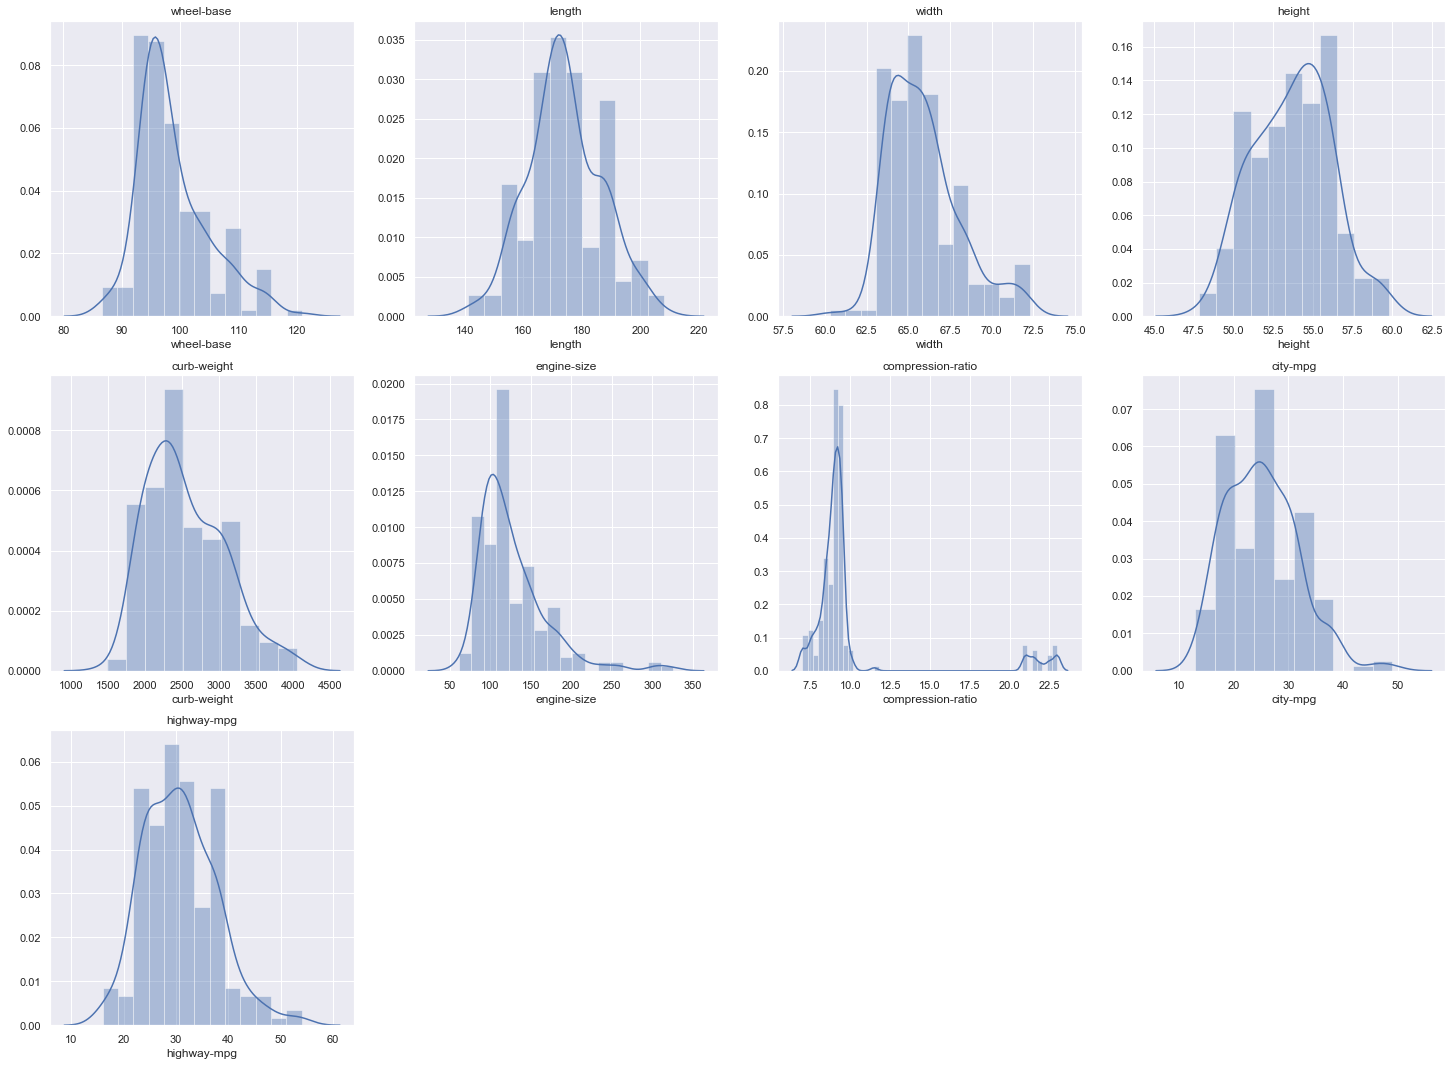

In [34]:
plt.figure(figsize=(25,25))
for i in range(len(bienLienTuc.columns)):
    plt.subplot(4,4,i+1)
    sb.distplot(bienLienTuc[bienLienTuc.columns[i]]).set(title=bienLienTuc.columns[i])

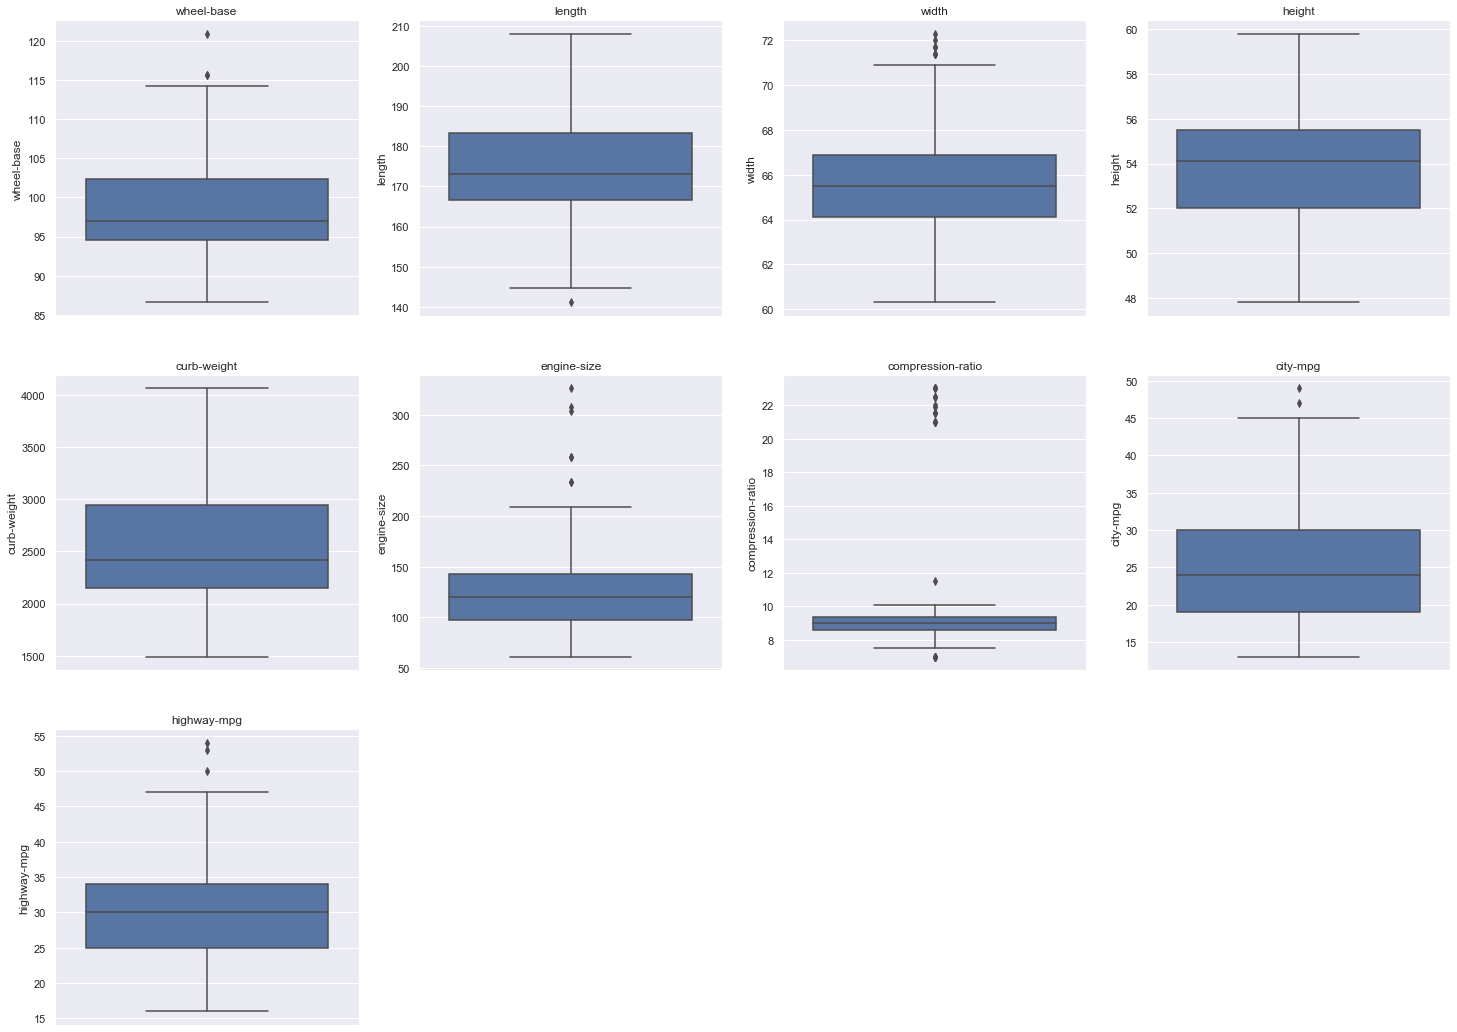

In [35]:
plt.figure(figsize=(25,25))
for i in range(len(bienLienTuc.columns)):
    plt.subplot(4,4,i+1)
    sb.boxplot(y=bienLienTuc[bienLienTuc.columns[i]]).set(title=bienLienTuc.columns[i])

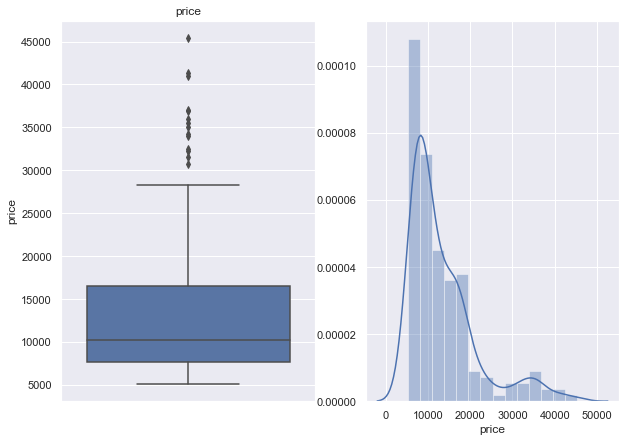

In [42]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sb.boxplot(y=bienLienTuc["price"]).set(title="price")
plt.subplot(1,2,2)
sb.distplot(bienLienTuc["price"])

In [45]:
print("median:",bienLienTuc["price"].median())
bienLienTuc["price"].describe()

median: 10245.0


count      193.000000
mean     13285.025907
std       8089.082886
min       5118.000000
25%       7738.000000
50%      10245.000000
75%      16515.000000
max      45400.000000
Name: price, dtype: float64

- Biểu đồ giá xe bị lệch phải,phần lớn giá xe có mức giá thấp giá trinh bình là 13000, và một nửa số xe là dưới 10000
- Khoảng 80% số lượng xe có giá thấp hơn 20000,
- có các xe có giá outlier, nhưng đây có thể là những siêu xe, đắt tiền, sản xuất hiếm nên giá sẽ rất cao

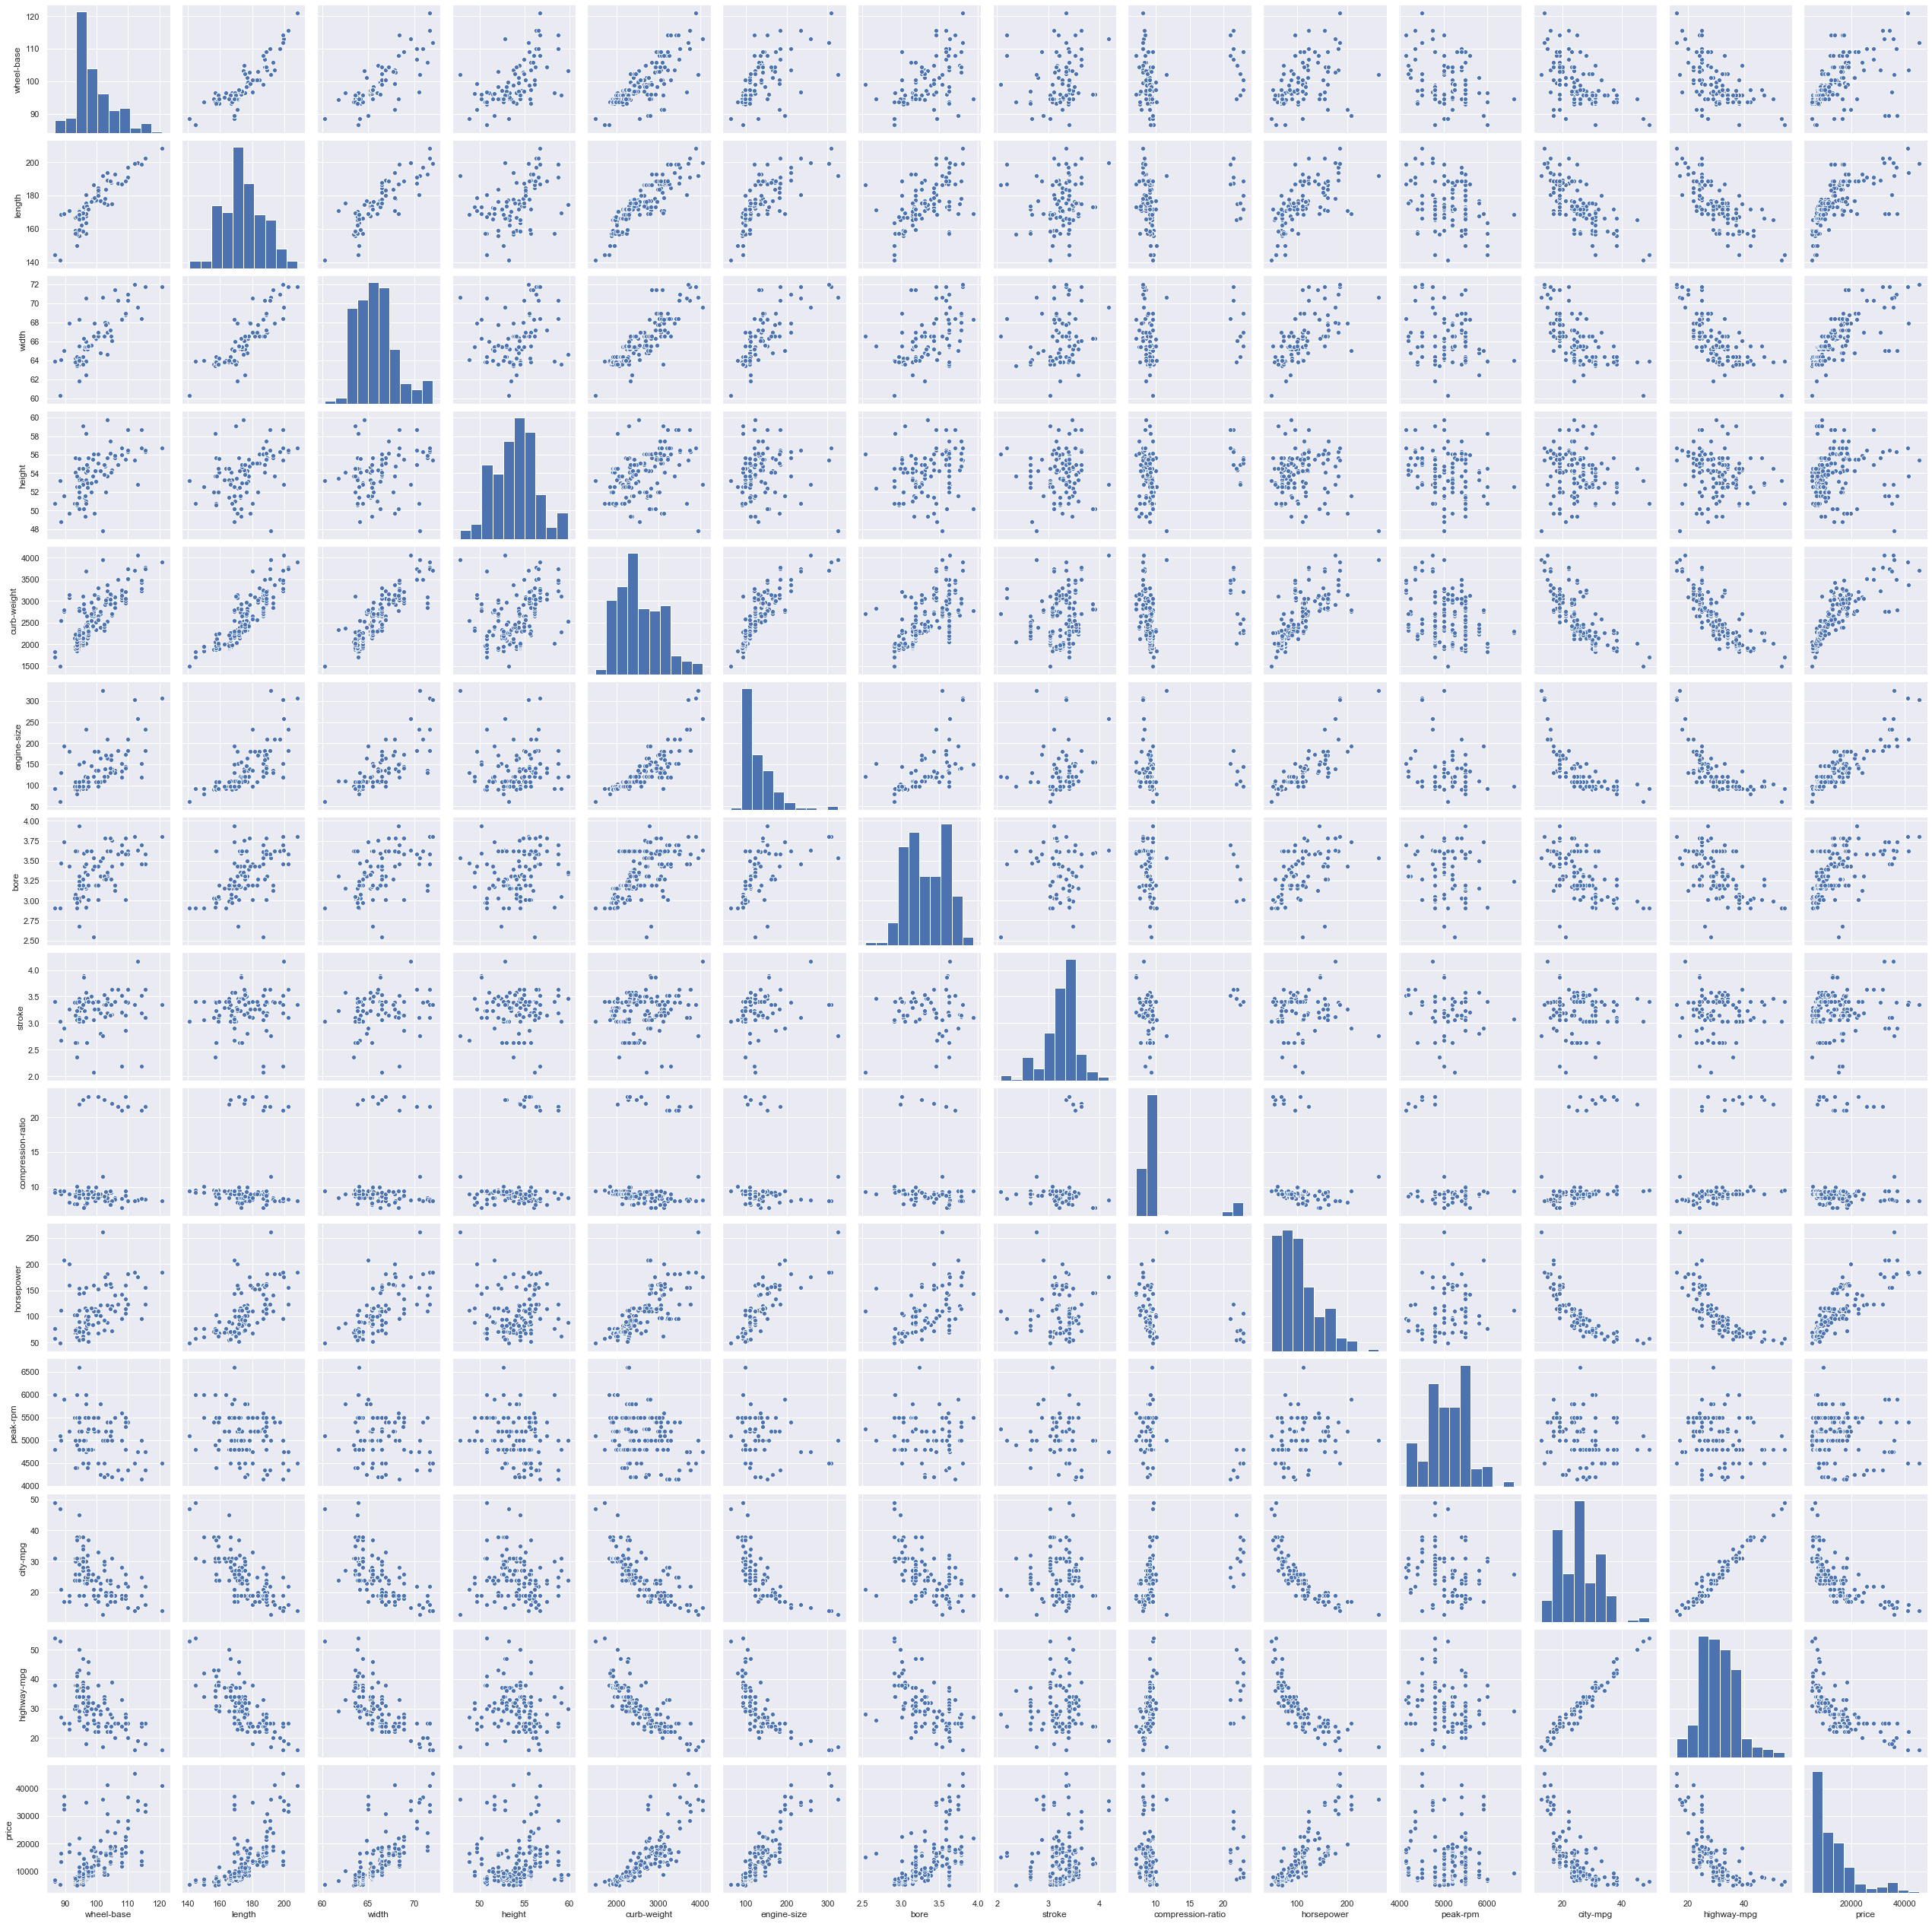

In [46]:
sb.pairplot(bienLienTuc)

In [47]:
bienLienTuc.corr()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007
compression-ratio,0.252234,0.156061,0.188631,0.253934,0.161030,0.025257,-0.004172,0.199600,1.000000,-0.203818,-0.439741,0.314648,0.249669,0.074483
horsepower,0.377040,0.589650,0.621532,-0.081730,0.762154,0.845325,0.572972,0.102913,-0.203818,1.000000,0.101383,-0.833615,-0.812078,0.812453


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 <a list of 14 Text xticklabel objects>)

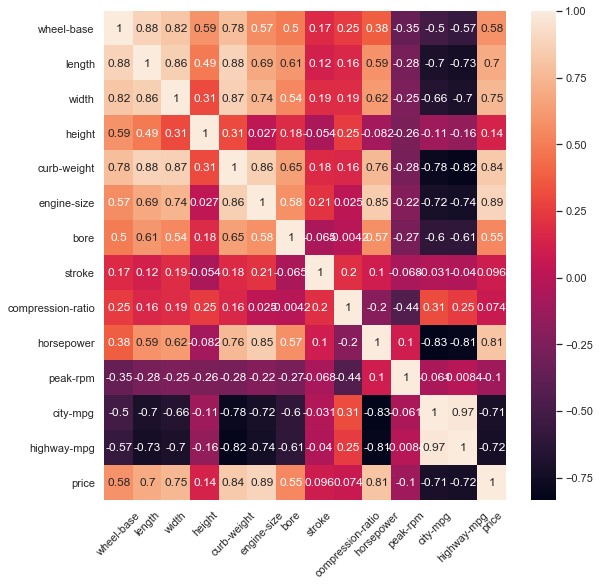

In [51]:
plt.figure(figsize=(9,9))
sb.heatmap(bienLienTuc.corr(),annot=True)
plt.xticks(rotation=45)

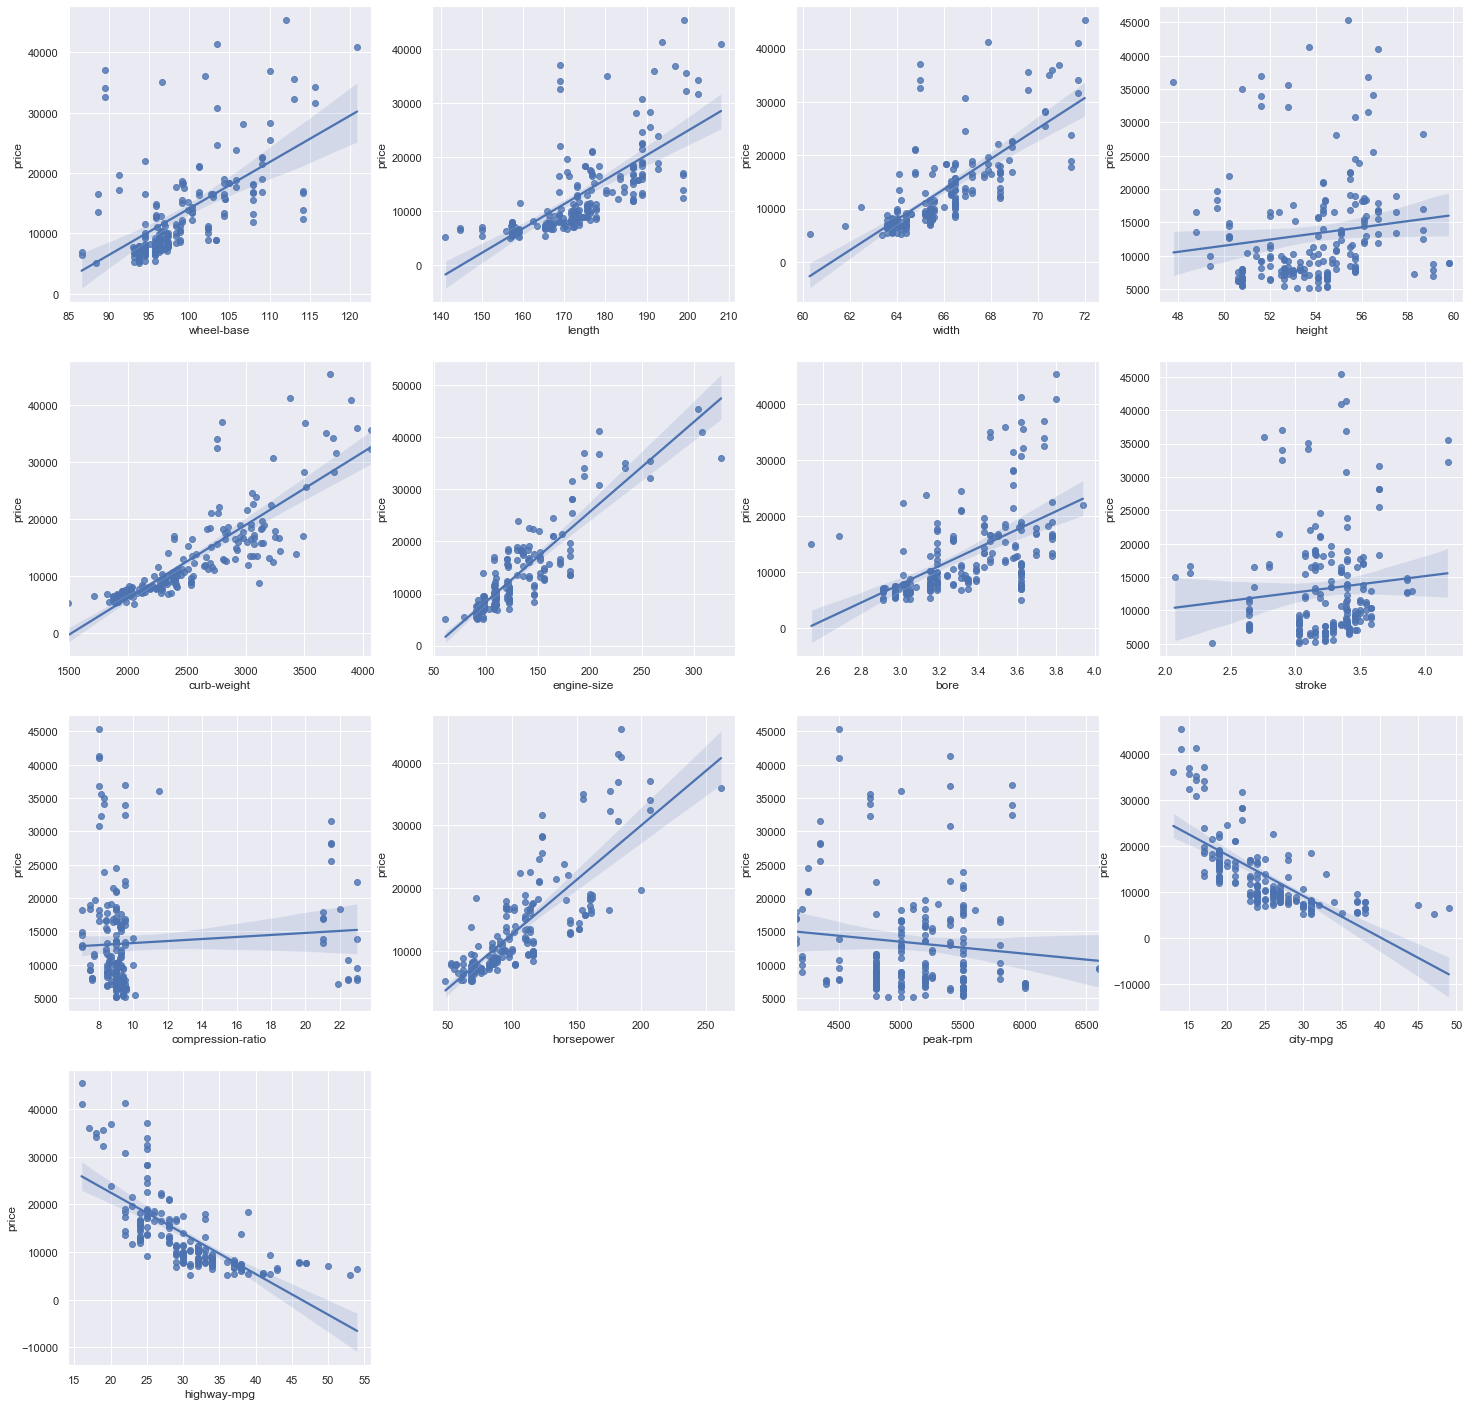

In [53]:
plt.figure(figsize=(25,25))

for i in range(len(bienLienTuc.columns)-1):
    plt.subplot(4,4,i+1)
    sb.regplot(bienLienTuc.columns[i],'price',data=bienLienTuc)

#### Dựa vào phân tích tương quan, biến có tương quan quan cao (>0.7 hoặc <-0.7) đối với price là city-mpg,highway-mpg,horsepower,engine-size,curb-weight,length,width
#### Nhưng trong các biến này lại có biến city-mpg và highway tương quan rất cao, là 0.97. do đó có thể 2 biến này là hiện tượng đa công tuyến khi 2 biến có tương quan quá cao. có thể loại bớt 1 biến để chống gây nhiễu, 
#### Biến weight và length cũng có tương quan cao là 0.86. điều này cũng có thể giải thích khi xe có chiều rộng lớn thì chiều dài cũng sẽ lớn hơn, để giữ được tỉ lên cân bằng của xe
#### Curb-weight và engine-size cũng có tương quan khá cao khi hệ số tương quan là 0.86

### Tính Skew va kurtosis

In [58]:
for i in range(len(bienLienTuc.columns)):
    skew=scipy.stats.skew(bienLienTuc[bienLienTuc.columns[i]])
    kur=scipy.stats.kurtosis(bienLienTuc[bienLienTuc.columns[i]])
    print(str(i+1)+": "+bienLienTuc.columns[i].ljust(12)+" co so skewness la:"+str(skew).ljust(20)+" va co kurtosis la: "+str(kur))  

1: wheel-base   co so skewness la:0.9678687575353311   va co kurtosis la: 0.748529752421486
2: length       co so skewness la:0.13679913237354796  va co kurtosis la: -0.14559000004996392
3: width        co so skewness la:0.8572246487285262   va co kurtosis la: 0.5210463836514174
4: height       co so skewness la:0.03465855309407428  va co kurtosis la: -0.34739038484990514
5: curb-weight  co so skewness la:0.6604244212953941   va co kurtosis la: -0.11896206922305108
6: engine-size  co so skewness la:1.9989128560619496   va co kurtosis la: 5.333864606058775
7: bore         co so skewness la:-0.025635924320538635 va co kurtosis la: -0.865954212560101
8: stroke       co so skewness la:-0.7413986346546673  va co kurtosis la: 2.040127636859917
9: compression-ratio co so skewness la:2.5822656628485574   va co kurtosis la: 5.011533108887491
10: horsepower   co so skewness la:1.127445227696605    va co kurtosis la: 1.1472744476962236
11: peak-rpm     co so skewness la:0.09637108118459307  va co

### Nhìn vào đồ thi và hệ số skewness và kurtosis thì ko có biến nào là phân phối chuẩn, khi length có skewness gần chuẩn nhưng độ nhọn lại khác phân phối chuẩn.

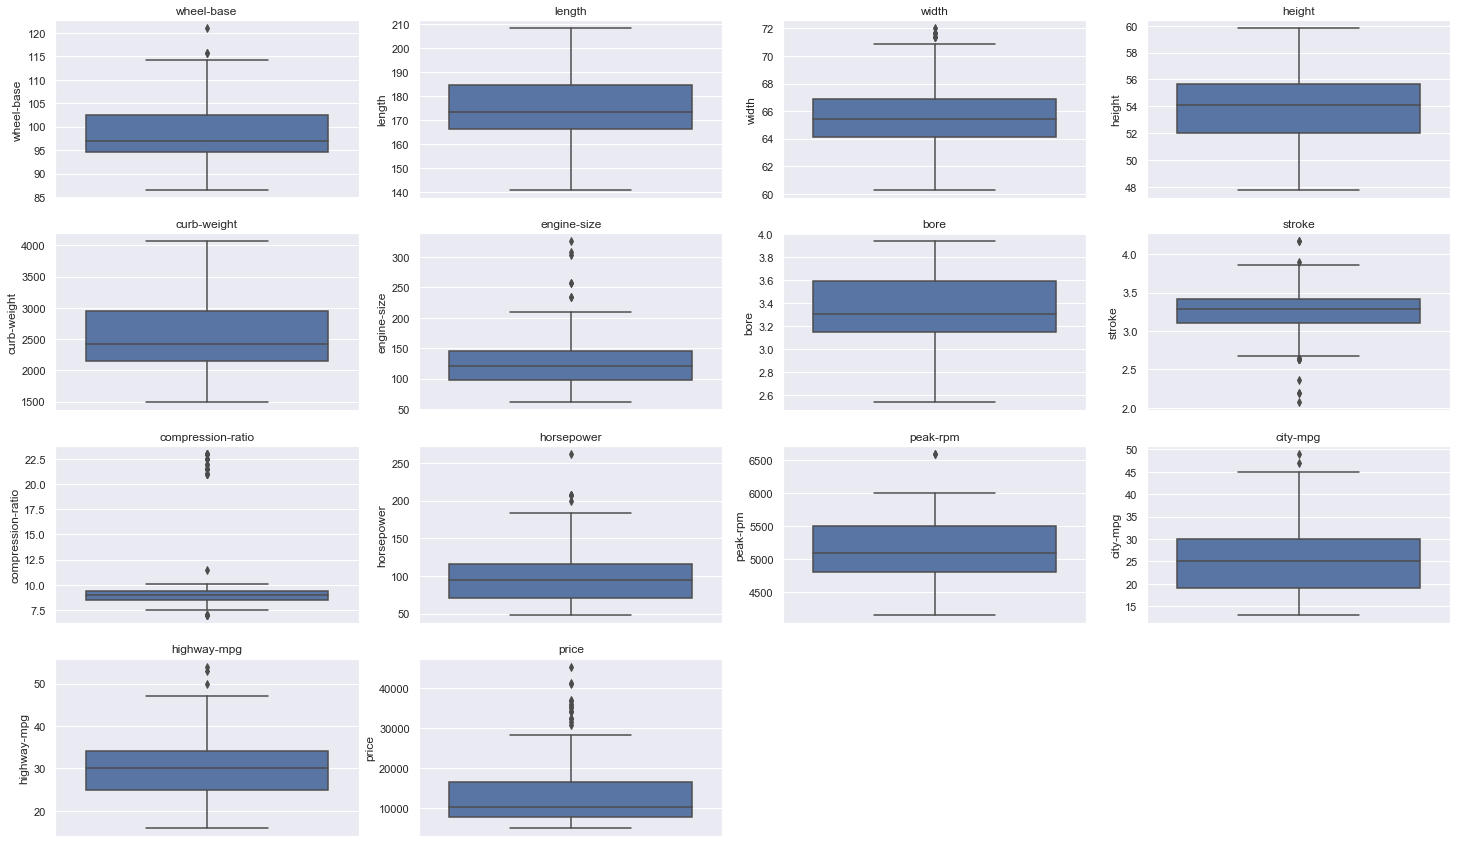

In [61]:
plt.figure(figsize=(25,15))
for i in range(len(bienLienTuc.columns)):
    plt.subplot(4,4,i+1)
    sb.boxplot(y=bienLienTuc[bienLienTuc.columns[i]]).set(title=bienLienTuc.columns[i])

## Kiểm tra số lượng outliers

In [65]:
for i in range(len(bienLienTuc.columns)):
    Q1=np.percentile(bienLienTuc[bienLienTuc.columns[i]],25)
    Q3=np.percentile(bienLienTuc[bienLienTuc.columns[i]],75)
    IQR=scipy.stats.iqr(bienLienTuc[bienLienTuc.columns[i]])
    soOutlier=bienLienTuc[bienLienTuc[bienLienTuc.columns[i]]>(Q3+1.5*IQR)].shape[0]+bienLienTuc[bienLienTuc[bienLienTuc.columns[i]]<(Q1-1.5*IQR)].shape[0]
    print(str(i+1)+": "+bienLienTuc.columns[i]+" co so outlier la:"+str(soOutlier))                                                   

1: wheel-base co so outlier la:3
2: length co so outlier la:0
3: width co so outlier la:7
4: height co so outlier la:0
5: curb-weight co so outlier la:0
6: engine-size co so outlier la:7
7: bore co so outlier la:0
8: stroke co so outlier la:18
9: compression-ratio co so outlier la:26
10: horsepower co so outlier la:5
11: peak-rpm co so outlier la:2
12: city-mpg co so outlier la:2
13: highway-mpg co so outlier la:3
14: price co so outlier la:14


### Nhìn vào biểu đồ và số lượng outliers thì có 4 biến không có outliers là length,height,curb-weight,bore. Trong khi đó các biến kia có số lượng outliers ko quá cao, và nhìn vào biểu đồ boxplot thì thấy ko  quá lệch so với giá trị thường, do đó sẽ được dữ lại và được scale bằng Robust scaler, trong khi đó 2 biến length và curb-weight sẽ được dùng MinMaxScaler

In [68]:
bienLienTuc.columns

Index(['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [69]:
scaler=preprocessing.MinMaxScaler()
minmax_scaler=scaler.fit_transform(bienLienTuc[["length","height","curb-weight","bore"]])
minmax_scaler=pd.DataFrame(minmax_scaler, columns=["length","height","curb-weight","bore"])
minmax_scaler.head()

,length,height,curb-weight,bore
0,0.413433,0.083333,0.411171,0.664286
1,0.413433,0.083333,0.411171,0.664286
2,0.449254,0.383333,0.517843,0.100000
3,0.529851,0.541667,0.329325,0.464286
4,0.529851,0.541667,0.518231,0.464286


In [70]:
scaler=preprocessing.RobustScaler()
robust_scaler=scaler.fit_transform(bienLienTuc[["wheel-base","width","engine-size","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]])
robust_scaler=pd.DataFrame(robust_scaler, columns=["wheel-base","width","engine-size","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"])
robust_scaler.head()

,wheel-base,width,engine-size,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-1.063291,-0.464286,0.208333,-2.033333,0.000000,0.347826,-0.142857,-0.363636,-0.333333,0.370286
1,-1.063291,-0.464286,0.208333,-2.033333,0.000000,0.347826,-0.142857,-0.363636,-0.333333,0.712658
2,-0.316456,0.035714,0.666667,0.600000,0.000000,1.282609,-0.142857,-0.545455,-0.444444,0.712658
3,0.354430,0.285714,-0.229167,0.366667,1.111111,0.152174,0.571429,-0.090909,0.000000,0.422126
4,0.303797,0.357143,0.333333,0.366667,-1.111111,0.434783,0.571429,-0.636364,-0.888889,0.820896


In [72]:
lienTuc=pd.concat([minmax_scaler,robust_scaler],axis=1)
lienTuc.head()

,length,height,curb-weight,bore,wheel-base,width,engine-size,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.413433,0.083333,0.411171,0.664286,-1.063291,-0.464286,0.208333,-2.033333,0.000000,0.347826,-0.142857,-0.363636,-0.333333,0.370286
1,0.413433,0.083333,0.411171,0.664286,-1.063291,-0.464286,0.208333,-2.033333,0.000000,0.347826,-0.142857,-0.363636,-0.333333,0.712658
2,0.449254,0.383333,0.517843,0.100000,-0.316456,0.035714,0.666667,0.600000,0.000000,1.282609,-0.142857,-0.545455,-0.444444,0.712658
3,0.529851,0.541667,0.329325,0.464286,0.354430,0.285714,-0.229167,0.366667,1.111111,0.152174,0.571429,-0.090909,0.000000,0.422126
4,0.529851,0.541667,0.518231,0.464286,0.303797,0.357143,0.333333,0.366667,-1.111111,0.434783,0.571429,-0.636364,-0.888889,0.820896


In [79]:
lienTuc.shape

(193, 14)

# Xử lý biến phân loại

In [80]:
bienPhanLoai=xe.select_dtypes(include=['object','category'])
bienPhanLoai.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [88]:
objects=bienPhanLoai.columns
i=1
for j in objects:
    print(i,"--".ljust(2),j.ljust(20),"--",str(len(data[j].unique())).ljust(4),"--:--",
          data[j].unique() if len(data[j].unique())<10 else "")
    i=i+1

1 -- symboling            -- 6    --:-- [3, 1, 2, 0, -1, -2]
Categories (6, int64): [3, 1, 2, 0, -1, -2]
2 -- make                 -- 22   --:-- 
3 -- fuel-type            -- 2    --:-- ['gas' 'diesel']
4 -- aspiration           -- 2    --:-- ['std' 'turbo']
5 -- num-of-doors         -- 2    --:-- ['two' 'four']
6 -- body-style           -- 5    --:-- ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
7 -- drive-wheels         -- 3    --:-- ['rwd' 'fwd' '4wd']
8 -- engine-location      -- 2    --:-- ['front' 'rear']
9 -- engine-type          -- 7    --:-- ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
10 -- num-of-cylinders     -- 7    --:-- ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
11 -- fuel-system          -- 8    --:-- ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


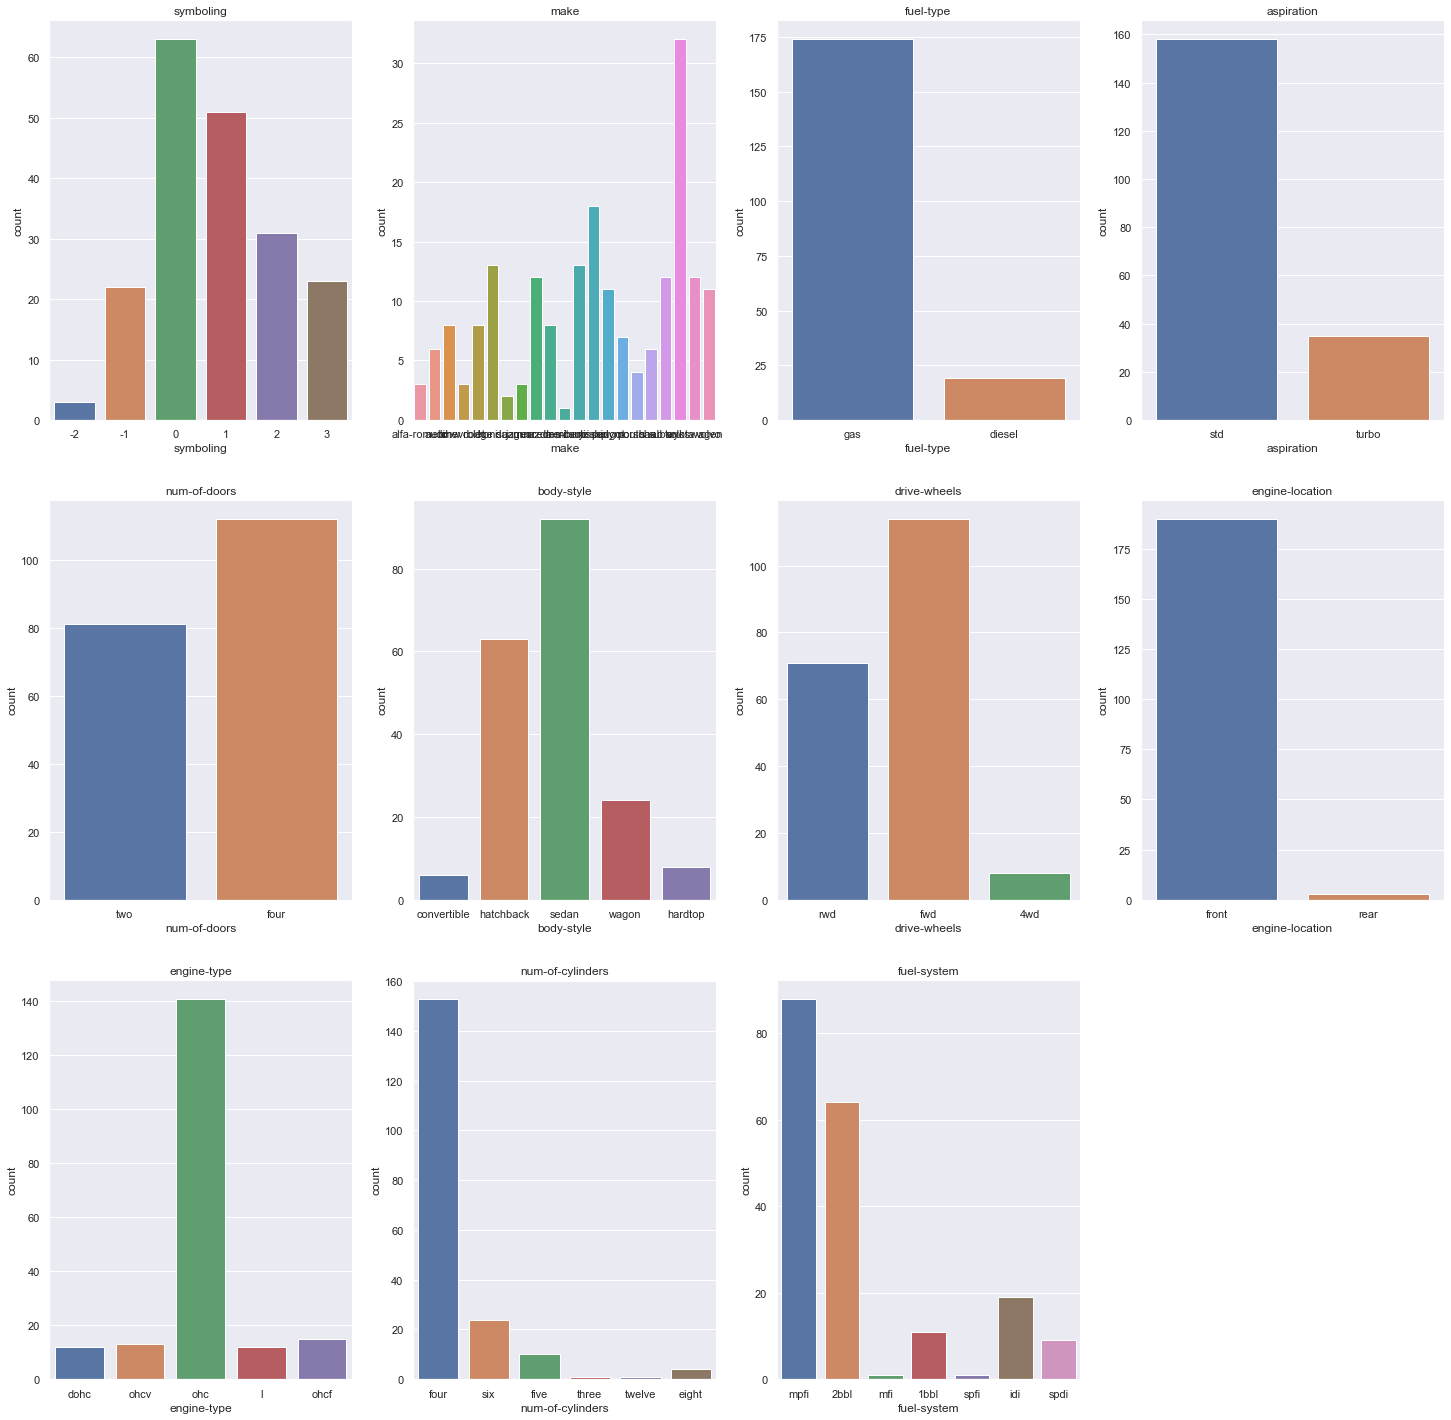

In [93]:
plt.figure(figsize=(25,25))
for i in range(len(bienPhanLoai.columns)):
    plt.subplot(3,4,i+1)
    sb.countplot(bienPhanLoai[bienPhanLoai.columns[i]]).set(title=bienPhanLoai.columns[i])

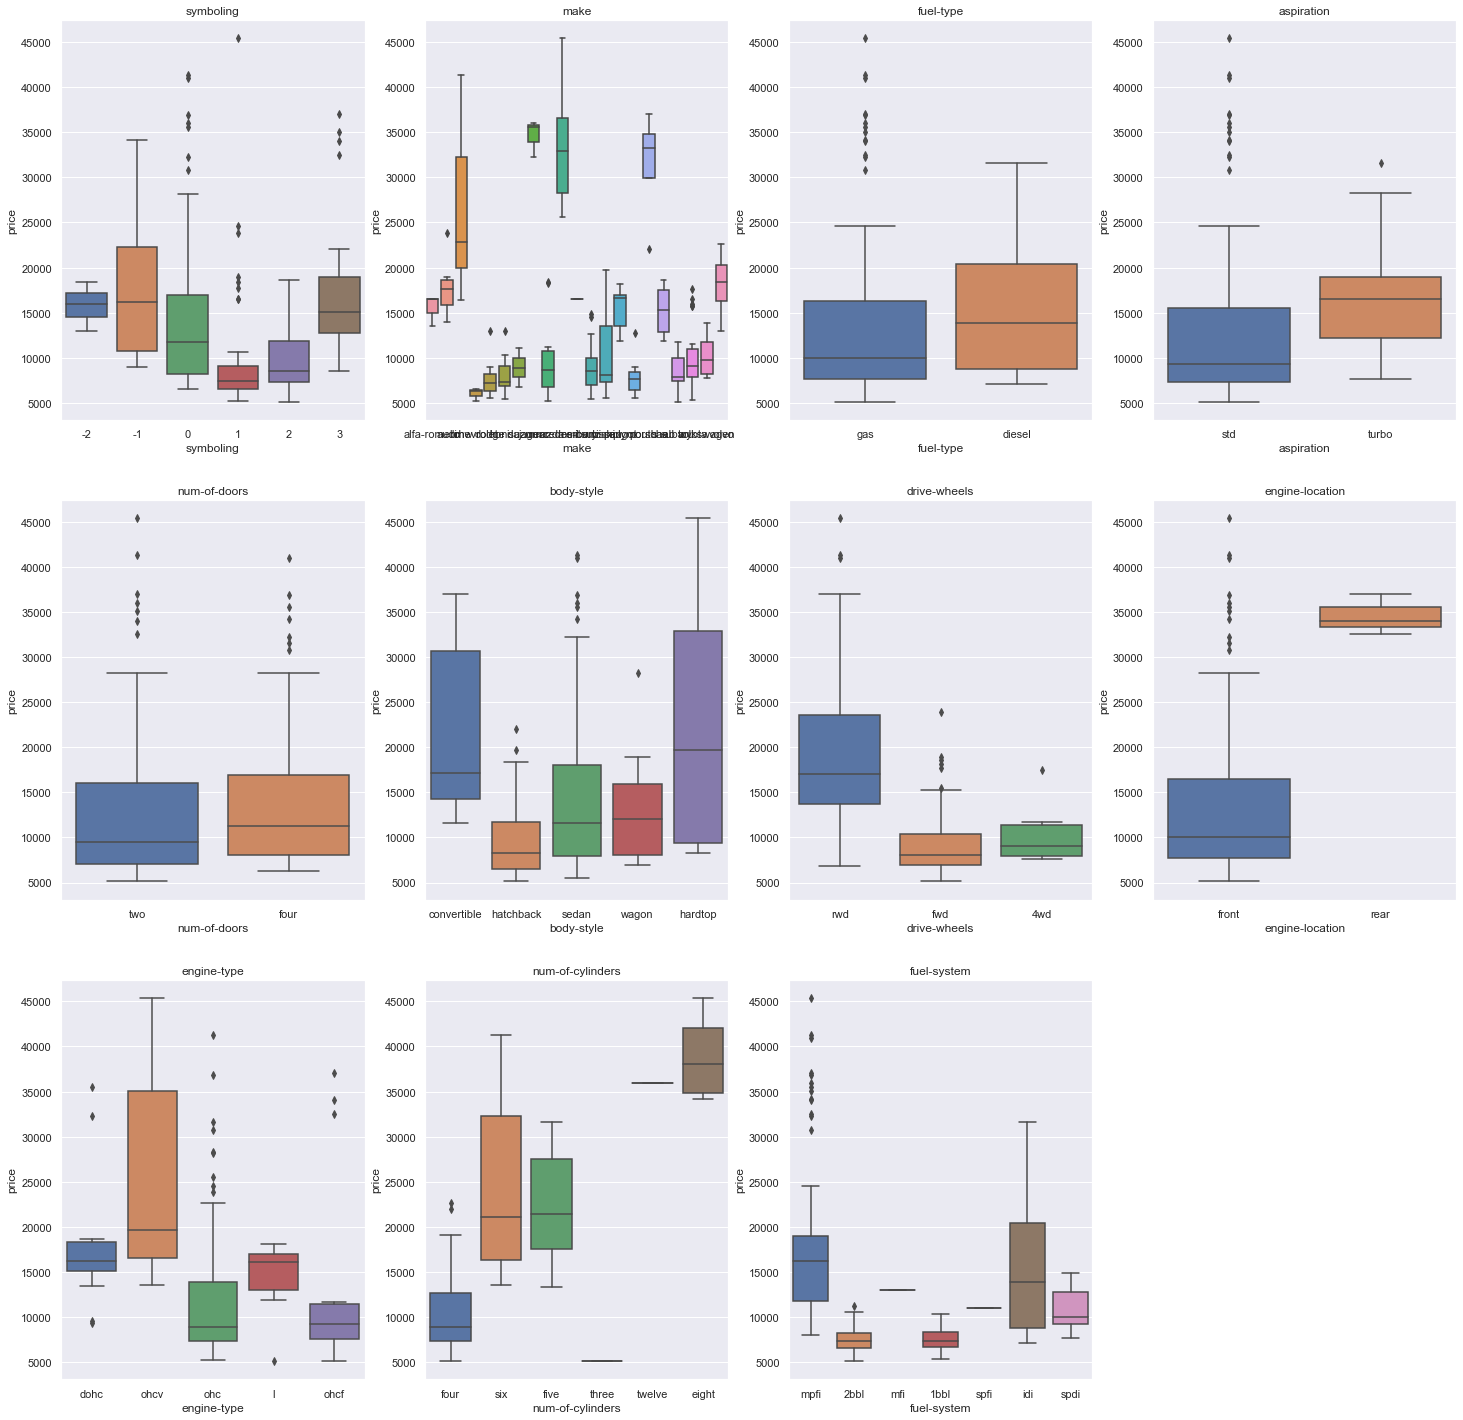

In [96]:
plt.figure(figsize=(25,25))
for i in range(len(bienPhanLoai.columns)):
    plt.subplot(3,4,i+1)
    sb.boxplot(y=xe["price"],x=bienPhanLoai[bienPhanLoai.columns[i]]).set(title=bienPhanLoai.columns[i])

- <b>Dựa trên biểu đồ có thể thấy mối liên quan giữa giá xe và các biến phân loại, do đó chúng ta cần phải chuyển đổi các biên phân loại bằng dummy encoder </b>
- <b> Có thể lấy Toyota có giá khá là thấp, do đó chiếm thị phần khá đông, trong khi có một số hãng xe thi phần thấp hơn và giá cao hơn, có thể thấy đây là các nhà sản xuất các dòng xe cao cấp </b>

## Feature Engineering

In [97]:
data_encode = pd.get_dummies(bienPhanLoai)
data_encode.tail()

,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,make_alfa-romero,make_audi,make_bmw,make_chevrolet,...,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
200,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
201,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
202,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
204,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
data_encode.reset_index(drop=True,inplace=True)

In [103]:
data_encode.columns

Index(['symboling_-2', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'aspiration_std', 'aspiration_turbo', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-location_rear', 'engine-type_dohc',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'num-of-cylinders_eight', 'num-of-cylinders_fiv

In [104]:
data_final=pd.concat([lienTuc,data_encode],axis=1)
data_final.head()

,length,height,curb-weight,bore,wheel-base,width,engine-size,stroke,compression-ratio,horsepower,...,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0.413433,0.083333,0.411171,0.664286,-1.063291,-0.464286,0.208333,-2.033333,0.000000,0.347826,...,0,0,0,0,0,0,0,1,0,0
1,0.413433,0.083333,0.411171,0.664286,-1.063291,-0.464286,0.208333,-2.033333,0.000000,0.347826,...,0,0,0,0,0,0,0,1,0,0
2,0.449254,0.383333,0.517843,0.100000,-0.316456,0.035714,0.666667,0.600000,0.000000,1.282609,...,1,0,0,0,0,0,0,1,0,0
3,0.529851,0.541667,0.329325,0.464286,0.354430,0.285714,-0.229167,0.366667,1.111111,0.152174,...,0,0,0,0,0,0,0,1,0,0
4,0.529851,0.541667,0.518231,0.464286,0.303797,0.357143,0.333333,0.366667,-1.111111,0.434783,...,0,0,0,0,0,0,0,1,0,0


In [105]:
data_final.shape

(193, 75)

In [106]:
x=data_final.drop(columns="price")
y=data_final["price"]
print(data_final.shape)
print(x.shape)
print(y.shape)

(193, 75)
(193, 74)
(193,)


## Lựa chọn biến

# Lựa chọn thử 5 biến

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [116]:
lm=LinearRegression()
rfe = RFE(lm, 5)
rfe.fit(x, y.values.ravel())

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [117]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False False False False False False False
 False False False False False False False False False  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False  True False False False False False False False False False False
 False False]
[61 62  1 11 64 63  9 69 66 68 65 70 67 17 35 32 34 48 47 41  5  1 38 33
 51 15  1 40  3 37 22 39 24 23  2  8 21 25 50  7 46 26 13 27 60 59 10 56
 55 54 19 45 49 31  4  1 43 44 57 20 18  1 29 58 30  6 28 36 52 42 12 53
 14 16]


In [120]:
x.columns[rfe.support_]

Index(['curb-weight', 'make_bmw', 'make_jaguar', 'engine-location_rear',
       'num-of-cylinders_eight'],
      dtype='object')

In [123]:
x1=x[x.columns[rfe.support_]]
x1.head()

,curb-weight,make_bmw,make_jaguar,engine-location_rear,num-of-cylinders_eight
0,0.411171,0,0,0,0
1,0.411171,0,0,0,0
2,0.517843,0,0,0,0
3,0.329325,0,0,0,0
4,0.518231,0,0,0,0


## Thực hiện mô hình

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x1,y,train_size=0.7,test_size=0.3,random_state=20)

In [125]:
lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

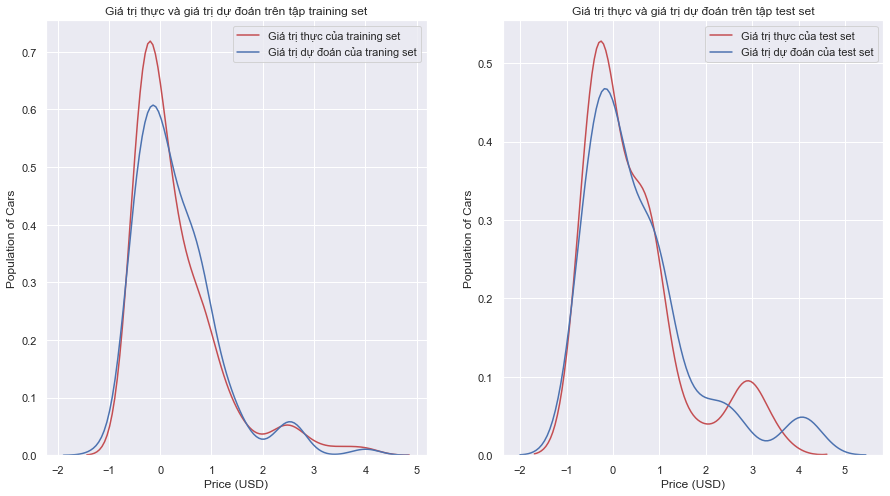

In [128]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax1=sb.distplot(y_train,hist=False,color='r',label='Giá trị thực của training set')
sb.distplot(y_pred_train,hist=False,color='b',label='Giá trị dự đoán của traning set',ax=ax1)
plt.title('Giá trị thực và giá trị dự đoán trên tập training set')
plt.xlabel('Price (USD)')
plt.ylabel('Population of Cars')
plt.subplot(1,2,2)
ax2 = sb.distplot(y_test,hist=False,color='r',label='Giá trị thực của test set')
sb.distplot(y_pred_test,hist=False, color='b',label='Giá trị dự đoán của test set',ax=ax2)
plt.title('Giá trị thực và giá trị dự đoán trên tập test set')
plt.xlabel('Price (USD)')
plt.ylabel('Population of Cars')
plt.show()

In [130]:
print('R-square training set: ', lm.score(X_train,y_train))
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE của giá trị thật và giá trị dự đoán trên tập training set: ', mse_train)

R-square training set:  0.87724402314204
MSE của giá trị thật và giá trị dự đoán trên tập training set:  0.08953741997552693


In [132]:
print('R-square trên test sett: ', lm.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE của giá trị thật và giá trị dự đoán trên tập test set: ', mse_test)

R-square trên test sett:  0.8688288139200825
MSE của giá trị thật và giá trị dự đoán trên tập test set:  0.144361746547945


## Kết quả cho ra khá tốt khi R_square trên train test là 87.7%, và test set là 86.9% , không có hiện tượng overfitting, nhưng để lựa chọn ra mô hình tốt nhất, em sẽ vẽ đồ thị biểu diễn R_square dựa trên số biến

# Thực hiện lựa chọn mô hình có số lượng biến tốt nhất

In [133]:
r_sq_train=list()
r_sq_test=list()
for i in range(75):
    lm=LinearRegression()
    rfe = RFE(lm, i+1)
    rfe.fit(x, y.values.ravel())
    x1=x[x.columns[rfe.support_]]
    X_train,X_test,y_train,y_test=train_test_split(x1,y,train_size=0.7,test_size=0.3,random_state=20)
    lm=LinearRegression()
    lm.fit(X_train,y_train)
    y_pred_test=lm.predict(X_test)
    y_pred_train=lm.predict(X_train)
    a= lm.score(X_train,y_train)*100
    b=lm.score(X_test,y_test)*100
    r_sq_train.append(a)
    r_sq_test.append(b)

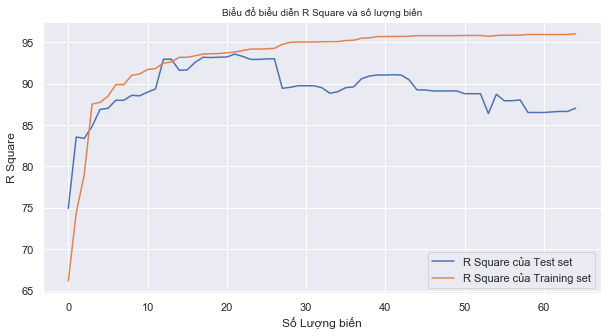

In [136]:
plt.figure(figsize=(10,5))
plt.plot(r_sq_test[0:65],label="R Square của Test set")
plt.plot(r_sq_train[0:65],label="R Square của Training set")
plt.title("Biểu đổ biểu diễn R Square và số lượng biến",size=10)
plt.xlabel("Số Lượng biến")
plt.ylabel("R Square")
plt.legend()

In [140]:
max(r_sq_test)

93.54743102757163

In [141]:
r_sq_test.index(max(r_sq_test))

21

### Dựa vào đồ thị trên chúng ta có thể thấy khi số lượng biến tăng từ 1 đến 25 thì R-Square của cả tập training set và test set đều tăng, nhưng sau đó khi số lượng biến tăng thì xảy ra hiện tượng overfitting khi R-Square của Traning set tăng và R-Square của Test set giảm, sau đó R-Square của test set lại lên xuống thất thường, đển số lượng biến là 26,27 thì lại giảm mạnh, ở vị trí này xảy ra overfitting rất rõ ràng

### Nhưng với bài toán này, em xin lựa chọn 22 mẫu để thực hiện mô hình vì có R-Square cao nhất và không có hiện tượng overfitting

# Thực hiện mô hình với 22 mẫu

In [142]:
lm=LinearRegression()
rfe = RFE(lm, 22)
rfe.fit(x, y.values.ravel())
x.columns[rfe.support_]

Index(['curb-weight', 'bore', 'engine-size', 'symboling_-2', 'make_audi',
       'make_bmw', 'make_isuzu', 'make_jaguar', 'make_mercedes-benz',
       'make_porsche', 'make_saab', 'make_volvo', 'aspiration_std',
       'body-style_convertible', 'engine-location_front',
       'engine-location_rear', 'engine-type_ohcv', 'num-of-cylinders_eight',
       'num-of-cylinders_three', 'fuel-system_mfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')

In [145]:
x_final=x[x.columns[rfe.support_]]
x_final.head()

,curb-weight,bore,engine-size,symboling_-2,make_audi,make_bmw,make_isuzu,make_jaguar,make_mercedes-benz,make_porsche,...,aspiration_std,body-style_convertible,engine-location_front,engine-location_rear,engine-type_ohcv,num-of-cylinders_eight,num-of-cylinders_three,fuel-system_mfi,fuel-system_spdi,fuel-system_spfi
0,0.411171,0.664286,0.208333,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1,0.411171,0.664286,0.208333,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,0.517843,0.100000,0.666667,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
3,0.329325,0.464286,-0.229167,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0.518231,0.464286,0.333333,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [146]:

X_train_final,X_test_final,y_train_final,y_test_final=train_test_split(x_final,y,train_size=0.7,test_size=0.3,random_state=20)
lm=LinearRegression()
lm.fit(X_train_final,y_train_final)
y_pred_test_final=lm.predict(X_test_final)
y_pred_train_final=lm.predict(X_train_final)

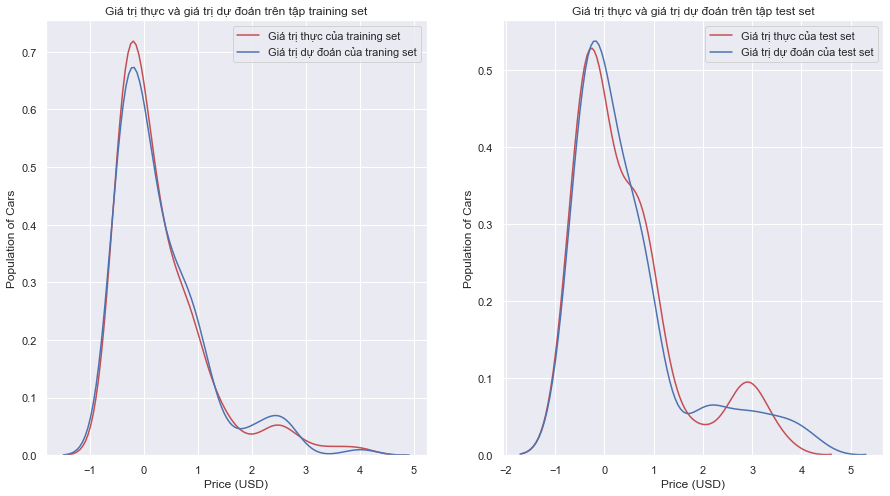

In [148]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax1=sb.distplot(y_train_final,hist=False,color='r',label='Giá trị thực của training set')
sb.distplot(y_pred_train_final,hist=False,color='b',label='Giá trị dự đoán của traning set',ax=ax1)
plt.title('Giá trị thực và giá trị dự đoán trên tập training set')
plt.xlabel('Price (USD)')
plt.ylabel('Population of Cars')
plt.subplot(1,2,2)
ax2 = sb.distplot(y_test_final,hist=False,color='r',label='Giá trị thực của test set')
sb.distplot(y_pred_test_final,hist=False, color='b',label='Giá trị dự đoán của test set',ax=ax2)
plt.title('Giá trị thực và giá trị dự đoán trên tập test set')
plt.xlabel('Price (USD)')
plt.ylabel('Population of Cars')
plt.show()

In [153]:
print('R-square của Training set: ', lm.score(X_train_final,y_train_final))
mse_train_final=mean_squared_error(y_train_final,y_pred_train_final)
print('MSE của giá trị thật và giá trị dự đoán trên tập training set: ',mse_train_final)

R-square của Training set:  0.9379244055935083
MSE của giá trị thật và giá trị dự đoán trên tập training set:  0.0452775393008826


In [154]:
print('R-square trên test sett: ', lm.score(X_test_final,y_test_final))
mse_test_final = mean_squared_error(y_test_final, y_pred_test_final)
print('MSE của giá trị thật và giá trị dự đoán trên tập test set: ', mse_test_final)

R-square trên test sett:  0.9354743102757164
MSE của giá trị thật và giá trị dự đoán trên tập test set:  0.07101438619403107


# Vậy em sẽ đã chọn 22 biến và có R-Square trên trainin set là: 93,8% và test set có 93.5%, Chúng ta cũng có thể cân nhắc giảm còn 10-21 biến để giảm chi phí tính toán và R-square trên 90%. 


# Thực hiện mô hình có lượng biến nhỏ hơn

In [157]:
lm=LinearRegression()
rfe14 = RFE(lm, 14)
rfe14.fit(x, y.values.ravel())
x.columns[rfe14.support_]

Index(['curb-weight', 'engine-size', 'make_audi', 'make_bmw', 'make_jaguar',
       'make_mercedes-benz', 'make_porsche', 'make_saab', 'make_volvo',
       'body-style_convertible', 'engine-location_front',
       'engine-location_rear', 'num-of-cylinders_eight',
       'num-of-cylinders_three'],
      dtype='object')

In [159]:
x_final14=x[x.columns[rfe14.support_]]
x_final14.head()

,curb-weight,engine-size,make_audi,make_bmw,make_jaguar,make_mercedes-benz,make_porsche,make_saab,make_volvo,body-style_convertible,engine-location_front,engine-location_rear,num-of-cylinders_eight,num-of-cylinders_three
0,0.411171,0.208333,0,0,0,0,0,0,0,1,1,0,0,0
1,0.411171,0.208333,0,0,0,0,0,0,0,1,1,0,0,0
2,0.517843,0.666667,0,0,0,0,0,0,0,0,1,0,0,0
3,0.329325,-0.229167,1,0,0,0,0,0,0,0,1,0,0,0
4,0.518231,0.333333,1,0,0,0,0,0,0,0,1,0,0,0


In [160]:

X_train_final14,X_test_final14,y_train_final14,y_test_final14=train_test_split(x_final14,y,train_size=0.7,test_size=0.3,random_state=20)
lm14=LinearRegression()
lm14.fit(X_train_final14,y_train_final14)
y_pred_test_final14=lm14.predict(X_test_final14)
y_pred_train_final14=lm14.predict(X_train_final14)

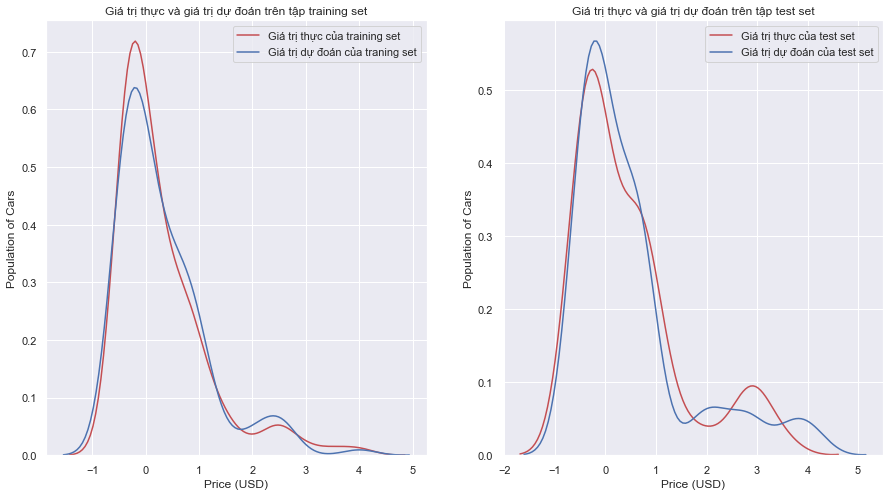

In [161]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax1=sb.distplot(y_train_final14,hist=False,color='r',label='Giá trị thực của training set')
sb.distplot(y_pred_train_final14,hist=False,color='b',label='Giá trị dự đoán của traning set',ax=ax1)
plt.title('Giá trị thực và giá trị dự đoán trên tập training set')
plt.xlabel('Price (USD)')
plt.ylabel('Population of Cars')
plt.subplot(1,2,2)
ax2 = sb.distplot(y_test_final14,hist=False,color='r',label='Giá trị thực của test set')
sb.distplot(y_pred_test_final14,hist=False, color='b',label='Giá trị dự đoán của test set',ax=ax2)
plt.title('Giá trị thực và giá trị dự đoán trên tập test set')
plt.xlabel('Price (USD)')
plt.ylabel('Population of Cars')
plt.show()

In [166]:
print('R-square của Training set: ', lm14.score(X_train_final14,y_train_final14))
mse_train_final14=mean_squared_error(y_train_final14,y_pred_train_final14)
print('MSE của giá trị thật và giá trị dự đoán trên tập training set: ',mse_train_final14)

R-square của Training set:  0.9260483156916628
MSE của giá trị thật và giá trị dự đoán trên tập training set:  0.05393988289038505


In [168]:
print('R-square trên test sett: ', lm14.score(X_test_final14,y_test_final14))
mse_test_final14 = mean_squared_error(y_test_final14, y_pred_test_final14)
print('MSE của giá trị thật và giá trị dự đoán trên tập test set: ', mse_test_final14)

R-square trên test sett:  0.9293643492828557
MSE của giá trị thật và giá trị dự đoán trên tập test set:  0.0777387642120188


# Có thể thấy, khi sử dụng 14 biến thì kết quả cho ra cũng rất tốt, không thua so với 22 biến ở trên. khi R-square 22 biến là 93.8% và 93.5% cho training set và test set. Còn đối với 14 biến là 92.6% và 92.9%.
# Không xảy ra hiện tượng overfitting

# Thậm chí chúng ta có thể cân nhắc sử dụng mô hình khoảng 4-5 biến, kết quả mang lại cũng khá tốt khi R-Square là 88-90%, và mean Square error cũng tương đối thấp
# Việc lựa chọn mô hình tùy thuộc vào nhiều vấn đề, giảm số biến thì sẽ giảm được rất nhiều chi phí tính toán, nhưng độ chính xác sẽ kém đi hơn 1 xíu. Tùy vào từng trường hợp
# Em sẽ chọn 14 biến thay vì 22 biến. vì số lượng biến nhỏ hơn rất nhiều và hiệu quả mang lại là ngang nhau